In [33]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import os

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import dump_svmlight_file
from sklearn.cluster import k_means
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
import nltk

In [34]:
def read_file(filename):
    file = open(filename)
    lines = file.readlines()
    d1 = pd.DataFrame(np.zeros((150, 5)))
    for ind, line in enumerate(lines):
        line = line.split()
        d1[0][ind] = line[0]
        for i in line[1:]:
            d1[int(i[0])][ind] = i[2:]
    return d1

In [35]:
def dist_matrix(ftrd1,index):
    distarray = np.zeros((1,len(ftrd1)))
    for ind,i in enumerate(ftrd1.values):
        distarray[0][ind] = np.sqrt(np.sum((ftrd1.values[index]-i)**2))
    return distarray

In [36]:
def dist_mean(ftrd1,mean):
    distarray = np.zeros((len(ftrd1),len(mean)))
    for mean_i,i in enumerate(mean):
        for ind, j in enumerate(ftrd1.values):
            distarray[ind][mean_i] = np.sqrt(np.sum((i-j)**2))
    return distarray

In [37]:
def initial_centroids(ftrd1,index,cluster):
    mean = list()
    mean.append(ftrd1.values[index])
    distmat = np.zeros((1,len(ftrd1)))
    for k in range(1,cluster):
        distmat += dist_matrix(ftrd1,index)
        index = list(distmat[0]).index(max(distmat[0]))
        mean.append(ftrd1.values[index])
    return mean

In [38]:
def get_mean(cluster_label,d1,ftrd1,cluster):
    mean = list()
    for i in range(0,cluster):
        features = len(ftrd1.columns)
        dframe = ftrd1[d1["Cluster"]==i]
        average = dframe.mean(axis=0)
        mean.append(np.array(average))
    return mean

In [39]:
def sse(ftrd1,cluster_mean):
    error = list()
    for mean in cluster_mean:
        for i in ftrd1.values:
            error.append(np.sum((mean - i) ** 2))
    return error

In [40]:
def k_means(ftrd1,index,clusters):
    cluster_mean = initial_centroids(ftrd1,index,clusters)
    print("Initial Clusters found")
    cluster_old = list()
    for it in range(0,100):
        cluster_new = list()
        print("Iterations: ",it)
        mean_dist = dist_mean(ftrd1,cluster_mean)
        for mindist in mean_dist:
            minimum = min(mindist)
            if Counter(mindist)[minimum] > 1:
                rand = [r for r, x in enumerate(mindist) if x == minimum]
                cluster_new.append(random.choice(rand))
            else:
                cluster_new.append(list(mindist).index(minimum))
        d1["Cluster"] = cluster_new
        cluster_mean = get_mean(cluster_new,d1,ftrd1,clusters)
        if cluster_new == cluster_old:
            print("Clustered, Iteration: ",it)
            return cluster_mean
        else:
            cluster_old = cluster_new
    return cluster_mean,np.sum(dist_mean(ftrd1,cluster_mean))

In [41]:
def get_clusters(ftrd1,d1,clusters):
    final_clusters = dict()
    for i in range(0,clusters):
        final_clusters[i] = ftrd1[d1.Cluster == i]
    return final_clusters

In [42]:
def Tokenizer(str_input):
    str_input = str_input.lower()
    words = word_tokenize(str_input)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    #stem the words
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [43]:
path = "G:/DA - Hildeshim/ML Lab/Exercise 10/20news-bydate/20news-bydate-train/"
x = list()
y = list()
for newsgroup in os.listdir(path):
    for files in os.listdir(path+str(newsgroup)):
        with open(path+str(newsgroup)+"/"+str(files), 'rb') as file:
                x.append(file.read().decode('cp1252').encode("utf-8"))
                y.append(newsgroup)

In [44]:
vectorizer = TfidfVectorizer(tokenizer=Tokenizer,min_df=0.001,max_df=0.3, max_features=100000)

In [45]:
xTrain = vectorizer.fit_transform(x)

In [46]:
xTrain.shape

(11314, 10083)

In [47]:
xTrain = xTrain.todense()

In [48]:
d1 = pd.DataFrame(xTrain)
d1.columns = np.arange(1,10084)

In [49]:
yTrain = pd.DataFrame(y)
yTrain = yTrain.apply(lambda col: pd.factorize(col)[0])
d1[0] = yTrain

In [ ]:
ftrd1 = d1.drop(columns=0)
index = np.random.randint(0,len(d1)-1)

In [ ]:
start = time.time()
clusters = np.arange(1,16)
variance = list()
for k in clusters:
    var = 0
    print("k: ",k)
    clustermean = k_means(ftrd1,index,k)
    final_clusters = get_clusters(ftrd1,d1,k)
    error = 0
    for i in final_clusters:
        for j in final_clusters[i].values:
             error += np.sum(pow((clustermean[i] - j) ,2))
    variance.append(error)
end = time.time()
print("Time taken:", end - start)

k:  1
Initial Clusters found
Iterations:  0
Iterations:  1
Clustered, Iteration:  1
k:  2
Initial Clusters found
Iterations:  0
Iterations:  1
Iterations:  2
Iterations:  3
Iterations:  4
Iterations:  5
Iterations:  6
Iterations:  7
Iterations:  8
Iterations:  9
Iterations:  10
Iterations:  11
Iterations:  12
Iterations:  13
Iterations:  14
Iterations:  15
Clustered, Iteration:  15
k:  3
Initial Clusters found
Iterations:  0
Iterations:  1
Iterations:  2
Iterations:  3
Iterations:  4
Iterations:  5
Iterations:  6
Iterations:  7
Iterations:  8
Iterations:  9
Iterations:  10
Iterations:  11
Iterations:  12
Iterations:  13
Iterations:  14
Iterations:  15
Iterations:  16
Iterations:  17
Iterations:  18
Iterations:  19
Iterations:  20
Iterations:  21
Clustered, Iteration:  21
k:  4
Initial Clusters found
Iterations:  0
Iterations:  1
Iterations:  2
Iterations:  3
Iterations:  4
Iterations:  5
Iterations:  6
Iterations:  7
Iterations:  8
Iterations:  9
Iterations:  10
Iterations:  11
Iterati

In [208]:
final_clusters[20]

,1,2,3,4,5,6,7,8,9,10,...,10074,10075,10076,10077,10078,10079,10080,10081,10082,10083
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.000000,0.053279,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


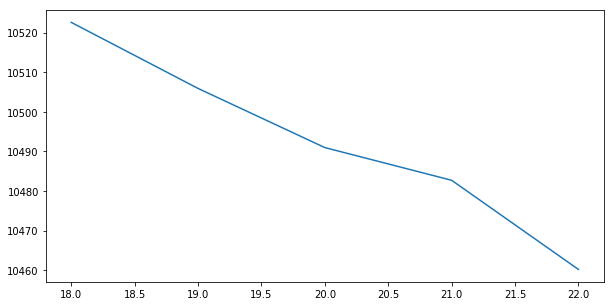

In [215]:
plt.figure(figsize=(10,5))
plt.plot(clusters,variance)

##  Testing with K: 20

In [22]:
start = time.time()
clusters = np.arange(20,21)
variance = list()
for k in clusters:
    var = 0
    print("k: ",k)
    clustermean = k_means(ftrd1,index,k)
    final_clusters = get_clusters(ftrd1,d1,k)
    error = 0
    for i in final_clusters:
        for j in final_clusters[i].values:
             error += np.sum(pow((clustermean[i] - j) ,2))
    variance.append(error)
end = time.time()
print("Time taken:", end - start)

k:  20
Initial Clusters found
Iterations:  0
Iterations:  1
Iterations:  2
Iterations:  3
Iterations:  4
Iterations:  5
Iterations:  6
Iterations:  7
Iterations:  8
Iterations:  9
Iterations:  10
Iterations:  11
Iterations:  12
Iterations:  13
Iterations:  14
Iterations:  15
Iterations:  16
Iterations:  17
Iterations:  18
Iterations:  19
Iterations:  20
Iterations:  21
Iterations:  22
Iterations:  23
Iterations:  24
Iterations:  25
Iterations:  26
Iterations:  27
Iterations:  28
Iterations:  29
Iterations:  30
Iterations:  31
Iterations:  32
Iterations:  33
Iterations:  34
Iterations:  35
Iterations:  36
Iterations:  37
Clustered, Iteration:  37
Time taken: 2939.9636714458466


In [23]:
variance

[10334.863116507688]

In [24]:
path = "G:/DA - Hildeshim/ML Lab/Exercise 10/20news-bydate/20news-bydate-test/"
xt = list()
yt = list()
for newsgroup in os.listdir(path):
    for files in os.listdir(path+str(newsgroup)):
        with open(path+str(newsgroup)+"/"+str(files), 'rb') as file:
                xt.append(file.read().decode('cp1252').encode("utf-8"))
                yt.append(newsgroup)

In [26]:
vectorizer = TfidfVectorizer(min_df=5)
xTest = vectorizer.fit_transform(xt)

In [27]:
xTest = xTest.todense()

In [28]:
xTest.shape

(7532, 19513)

In [47]:
yTest = pd.DataFrame(yt)
yTest = yTest.apply(lambda col: pd.factorize(col)[0])

In [243]:
xTrain.shape

(11314, 10083)

In [31]:
xt = np.array(xTest)
xtest = np.zeros((7532,25941))
xtest.shape

(7532, 25941)

In [32]:
for i,j in enumerate(xt):
    xtest[i][:19513] = j[:19513]

In [33]:
xtest.shape

(7532, 25941)

In [41]:
ypred = []
for i in xtest:
    clust = []
    for j in clustermean:
        clust.append(np.sum(pow((j - i),2)))
    ypred.append(clust.index(min(clust)))

In [48]:
print(classification_report(yTest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.00      0.00      0.00       389
           2       0.05      1.00      0.10       394
           3       0.00      0.00      0.00       392
           4       0.00      0.00      0.00       385
           5       0.00      0.00      0.00       395
           6       0.00      0.00      0.00       390
           7       0.00      0.00      0.00       396
           8       0.00      0.00      0.00       398
           9       0.00      0.00      0.00       397
          10       0.00      0.00      0.00       399
          11       0.00      0.00      0.00       396
          12       0.00      0.00      0.00       393
          13       0.00      0.00      0.00       396
          14       0.00      0.00      0.00       394
          15       0.00      0.00      0.00       398
          16       0.00      0.00      0.00       364
          17       0.00    

c:\users\raaghav\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
dump_svmlight_file(xTrain,yTrain,"train",zero_based=False,multilabel=None)